## Foundations of Modern Machine Learning, IIIT Hyderabad

Project: Perceptron and Gradient Descent

Note: Please write the code for the following tasks in separate code cells.  


# Notebook Imports and Packages

In [150]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Example 1 - A simple cost function

#### $$f(x) = x^2 + x + 1$$

In [151]:
def f(x):
    return x ** 2 + x + 1

In [152]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

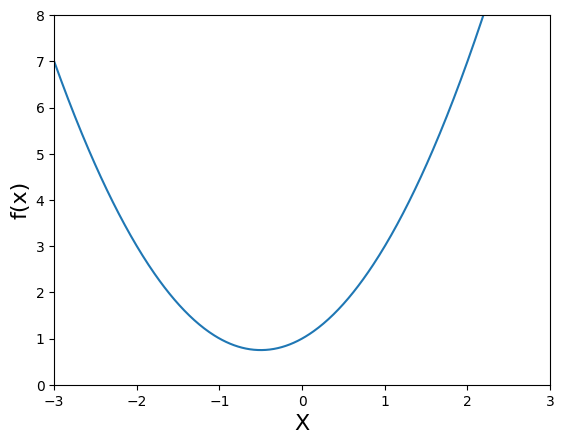

In [153]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [154]:
def df(x):
    return 2 * x + 1

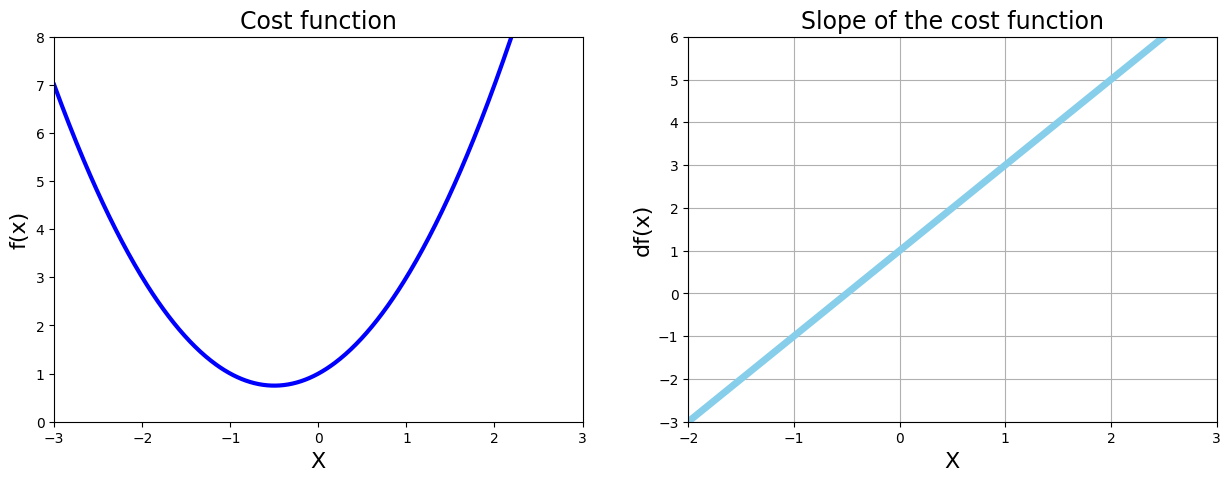

In [155]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

### Gradient Descent

In [156]:
##########################
##########################

## TASK-1 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  ## [DONE]
    new_x = previous_x - step_multiplier * gradient ## [DONE]

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))   ## [DONE])


    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


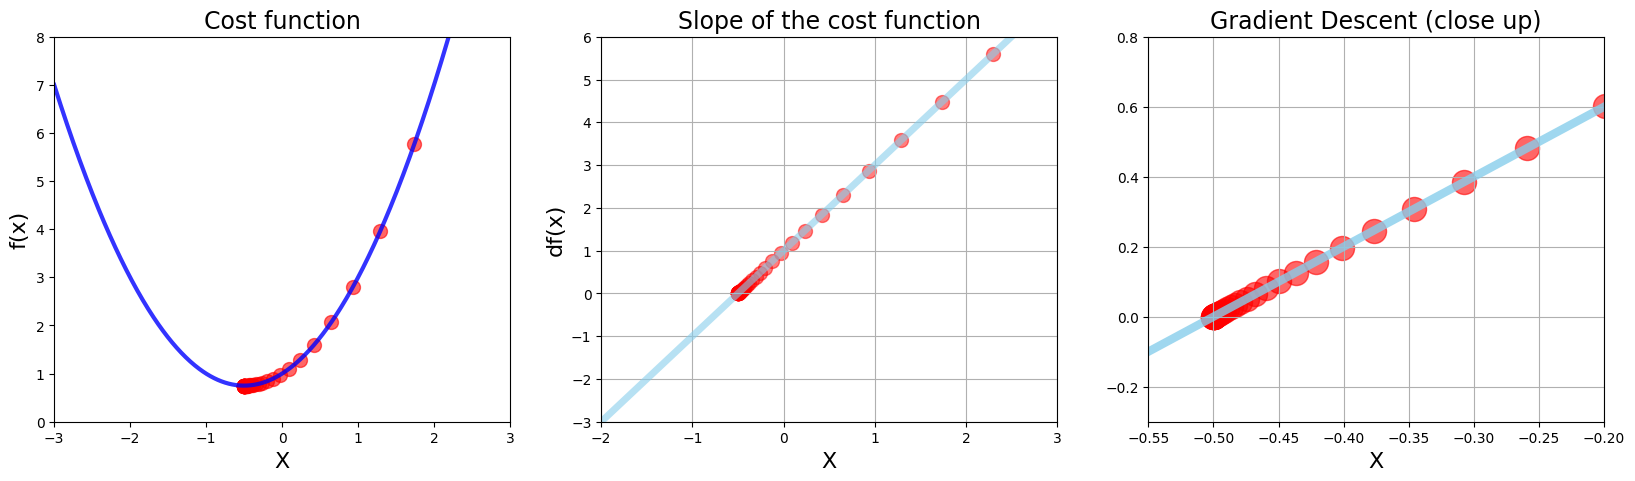

In [157]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

### Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

#### $$g(x) = x^4 - 4x^2 + 5$$

In [158]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return (x**4 - 4*x**2 + 5) ## [DONE]

def dg(x):
    return (4*x**3 - 8*x ) ## [DONE]

In [159]:
## TASK-3 : Plot function and derivative side by side like has been done earlier

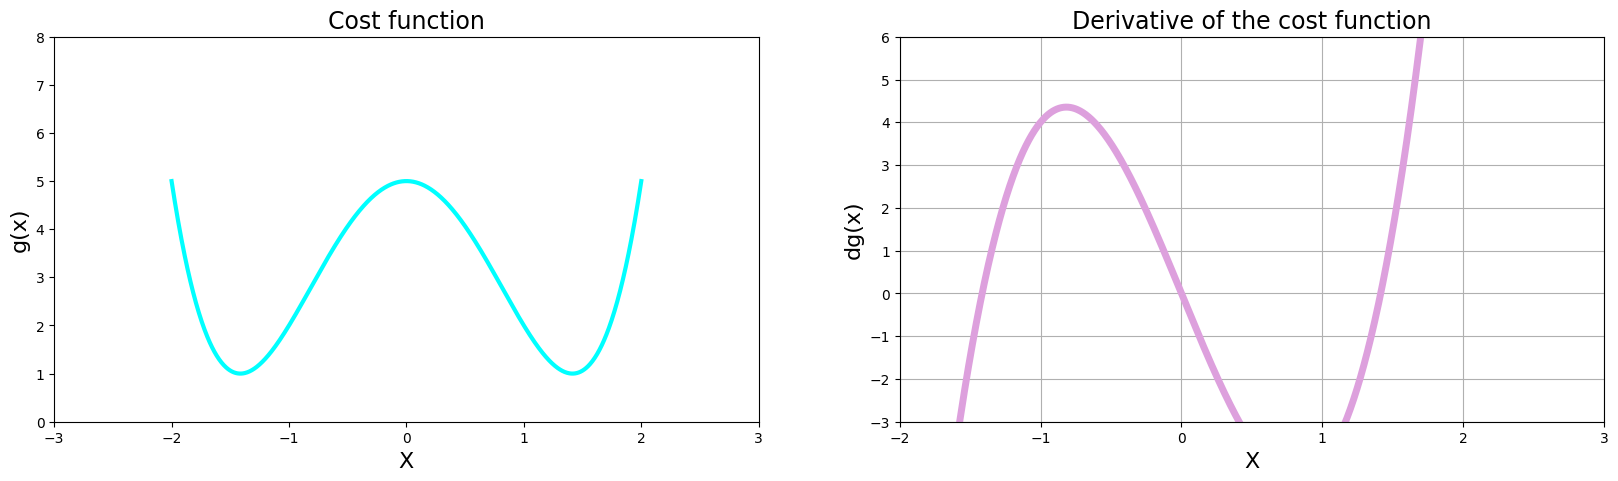

In [160]:
#TASK -3 [DONE]
plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='cyan', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Derivative of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_2, dg(x_2), color='plum', linewidth=5)

plt.show()

## Gradient Descent

In [161]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [162]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [163]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [164]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


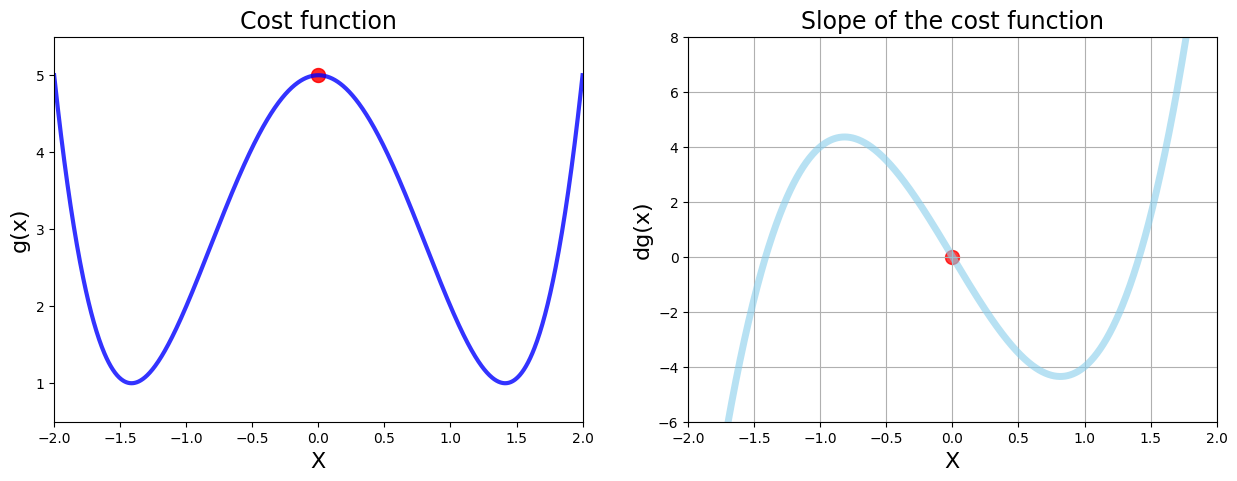

In [165]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

### Example 3 - Divergence and Overflow

#### $$h(x) = x^5 - 2x^4 + 2$$

In [166]:
## TASK-4 : Code the same things as they were done for the first two examples

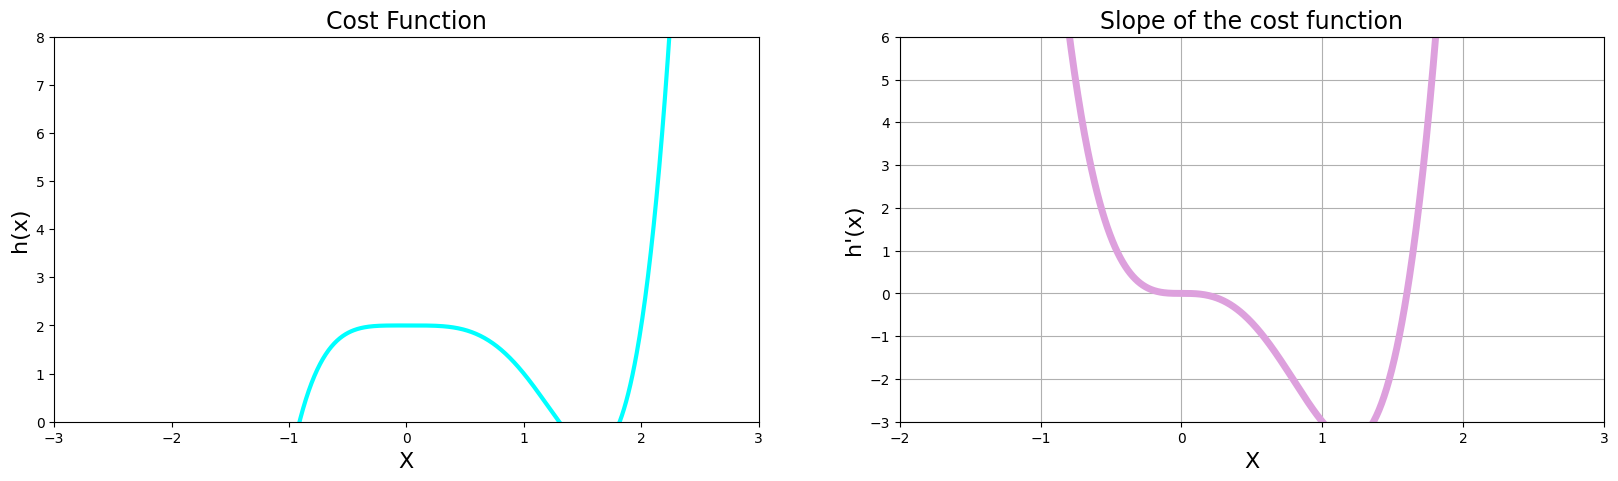

In [167]:
#TASK-4 DONE
#Make data
x_2 = np.linspace(-3, 3, 1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

plt.figure(figsize=[20, 5])

# 1st Chart: h(x)
plt.subplot(1, 2, 1)
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_2, h(x_2), color='cyan', linewidth=3)

# 2nd Chart: Derivative of h(x)
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h\'(x)', fontsize=16)
plt.grid(True)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.plot(x_2, dh(x_2), color='plum', linewidth=5)

# Show the plots
plt.show()

#### Learning Rate

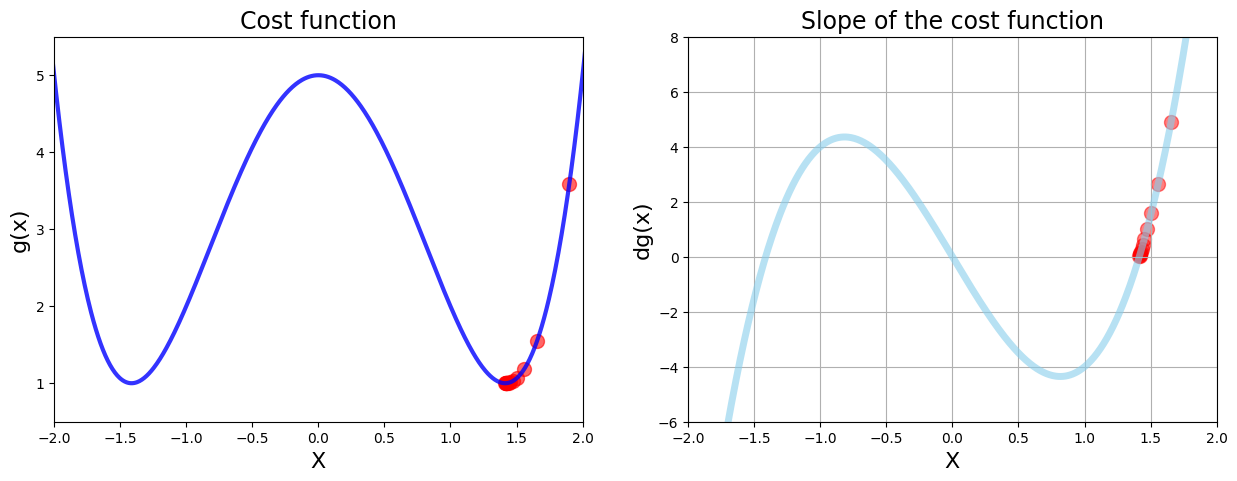

Number of steps is:  14


In [168]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

In [169]:
## TASK-5 : Run gradient descent 3 times
## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
n = 100

# Task-5 [DONE]-- low, mid, high --> 3 times
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)

#TASK-6 [DONE]
mid_gamma = 0.001 ## [DONE] --Values from Task-6
mid_gamma_result = gradient_descent(derivative_func=dg, initial_guess=3,
                                    multiplier=mid_gamma, precision=0.0001, max_iter=n)
high_gamma = 0.002## [DONE] --Values from Task-6
high_gamma_result = gradient_descent(derivative_func=dg, initial_guess=3,
                                     multiplier=high_gamma, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = 0.25 # Took from multiplier given below
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.25, precision=0.0001, max_iter=n)

print("Low Gamma Result:", low_gamma)
print("Mid Gamma Result:", mid_gamma_result)
print("High Gamma Result:", high_gamma_result)
print("Insane Gamma Result:", insane_gamma)

Low Gamma Result: (1.7488441762007887, [3, 2.958, 2.9180683961760003, 2.8800452461674326, 2.8437874313778595, 2.8091664411229798, 2.7760665043594512, 2.7443830061854295, 2.7140211390737248, 2.684894748698115, 2.656925341946347, 2.630041230797198, 2.604176790557754, 2.5792718147981915, 2.555270952401693, 2.532123214631493, 2.5097815421316145, 2.4882024234199407, 2.467345557777215, 2.447173556542411, 2.4276516777397608, 2.408747589722185, 2.3904311601488444, 2.3726742671441694, 2.355450629930521, 2.338735656601556, 2.3225063070204377, 2.306740969096069, 2.291419346919548, 2.276522359438565, 2.2620320485149046, 2.247931495353975, 2.23420474441911, 2.220836734050241, 2.207813233099061, 2.1951207829730466, 2.182746644550502, 2.1706787494896354, 2.1589056555078128, 2.147416505253677, 2.136200988435626, 2.125249306906031, 2.114552142432176, 2.104100626912783, 2.093886314823639, 2.0839011576976794, 2.0741374804642354, 2.0645879594893803, 2.0552456021746144, 2.0461037279847916, 2.03715595078838

In [170]:
# Print the final results for each case
print("Low Gamma Result:", low_gamma[-1])
print("Mid Gamma Result:", mid_gamma_result[-1])
print("High Gamma Result:", high_gamma_result[-1])
print("Insane Gamma Result:", insane_gamma[-1])


Low Gamma Result: [84, 79.86320764800001, 76.046300017135, 72.51562957914652, 69.24198050975954, 66.19987352705733, 63.36699634804325, 60.72373422340968, 58.252780751219824, 55.93881350353632, 53.76822229829764, 51.72888047888769, 49.80995151912524, 48.00172479299634, 46.29547554040093, 44.68334499975656, 43.15823742334807, 41.7137312854513, 40.34400246960749, 39.043757605300215, 37.80817603515217, 36.6328591466809, 35.51378600934986, 34.44727442729727, 33.42994665792973, 32.458699162236336, 31.530675848737044, 30.64324435304255, 29.793974961965827, 28.98062184732141, 28.20110632185864, 27.453501869729756, 26.73602073773792, 26.04700190235975, 25.38490025202916, 24.748276845089016, 24.13579012173349, 23.546187963645295, 22.978300508271577, 22.431033636102157, 21.903363059189818, 21.394328947709592, 20.90303103878638, 20.428624178287848, 19.97031425191962, 19.52735446688811, 19.099041949710095, 18.684714629531907, 18.283748379645516, 17.895554392814656, 17.519576768604196, 17.1552902931

In [171]:
## TASK-7 : Plot reduction in cost for each iteration

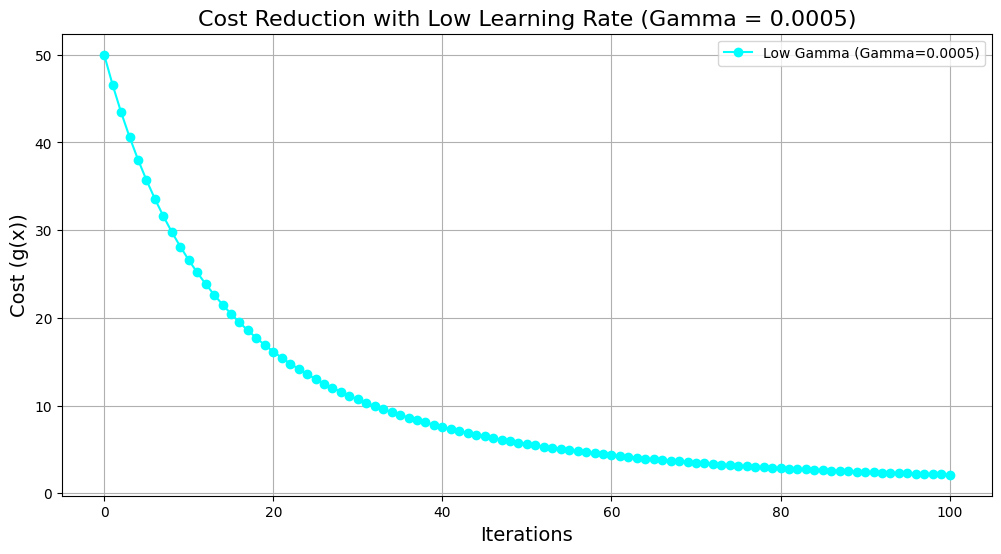

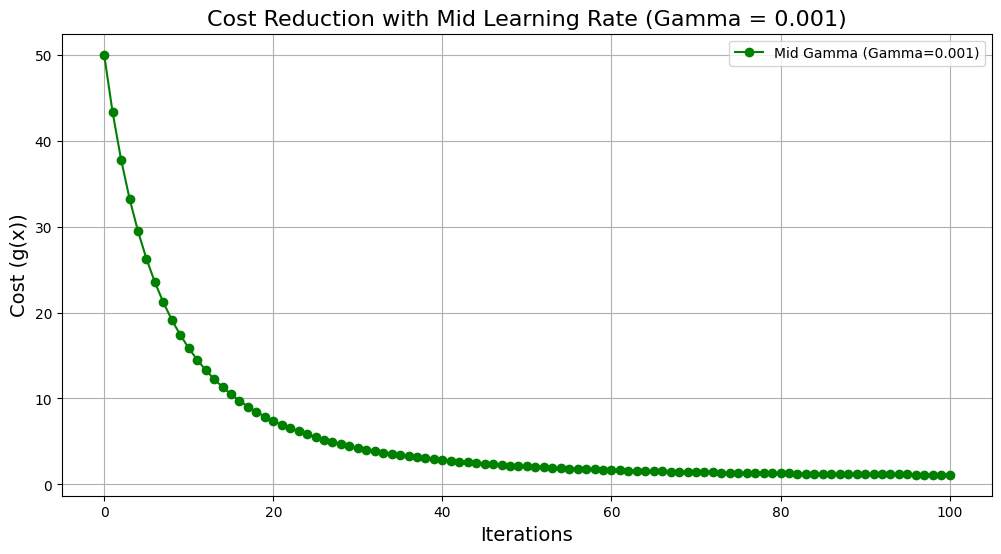

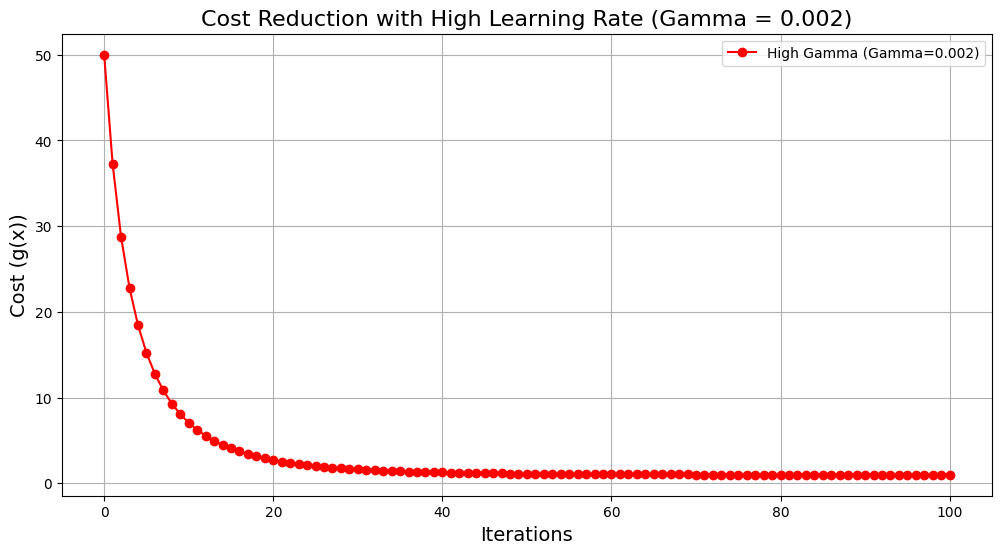

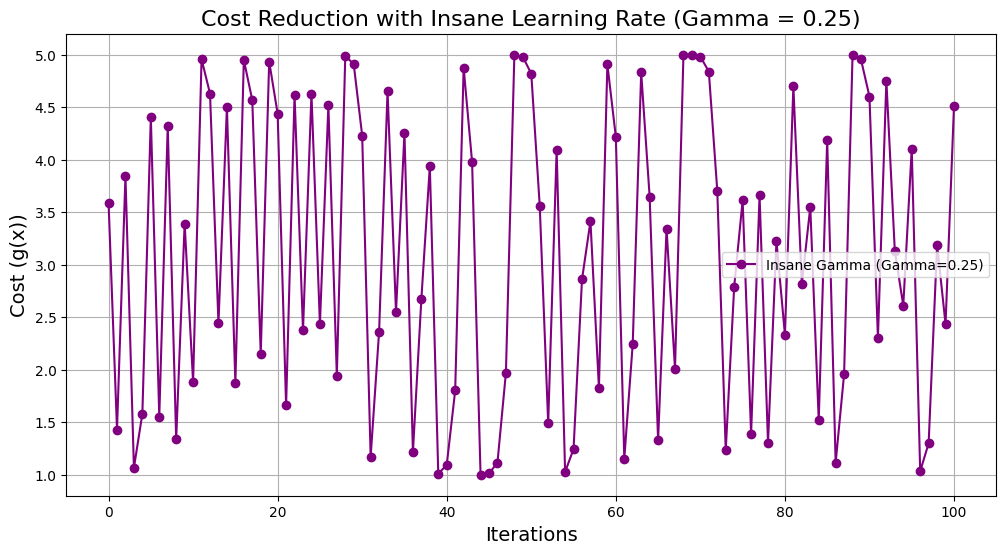

In [172]:
# TASK-7 [DONE]
import numpy as np
import matplotlib.pyplot as plt

# Gradient descent function that returns both x values and cost at each iteration
def gradient_descent(derivative_func, initial_guess, multiplier, max_iter):
    x = initial_guess
    x_vals = [x]
    cost_vals = [g(x)]
    for _ in range(max_iter):
        x -= multiplier * derivative_func(x)
        x_vals.append(x)
        cost_vals.append(g(x))
    return x_vals, cost_vals
n = 100

low_gamma = 0.0005
low_gamma_result, low_gamma_cost = gradient_descent(dg, initial_guess=3, multiplier=low_gamma, max_iter=n)

mid_gamma = 0.001
mid_gamma_result, mid_gamma_cost = gradient_descent(dg, initial_guess=3, multiplier=mid_gamma, max_iter=n)

high_gamma = 0.002
high_gamma_result, high_gamma_cost = gradient_descent(dg, initial_guess=3, multiplier=high_gamma, max_iter=n)

insane_gamma = 0.25
insane_gamma_result, insane_gamma_cost = gradient_descent(dg, initial_guess=1.9, multiplier=insane_gamma, max_iter=n)

# Plot for Low Gamma
plt.figure(figsize=(12, 6))
plt.plot(low_gamma_cost, label=f'Low Gamma (Gamma={low_gamma})', color='cyan', marker='o')
plt.title('Cost Reduction with Low Learning Rate (Gamma = 0.0005)', fontsize=16)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Cost (g(x))', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Plot for Mid Gamma
plt.figure(figsize=(12, 6))
plt.plot(mid_gamma_cost, label=f'Mid Gamma (Gamma={mid_gamma})', color='green', marker='o')
plt.title('Cost Reduction with Mid Learning Rate (Gamma = 0.001)', fontsize=16)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Cost (g(x))', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Plot for High Gamma
plt.figure(figsize=(12, 6))
plt.plot(high_gamma_cost, label=f'High Gamma (Gamma={high_gamma})', color='red', marker='o')
plt.title('Cost Reduction with High Learning Rate (Gamma = 0.002)', fontsize=16)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Cost (g(x))', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Plot for Insane Gamma
plt.figure(figsize=(12, 6))
plt.plot(insane_gamma_cost, label=f'Insane Gamma (Gamma={insane_gamma})', color='purple', marker='o')
plt.title('Cost Reduction with Insane Learning Rate (Gamma = 0.25)', fontsize=16)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Cost (g(x))', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


### Example 4 - Data Viz with 3D Charts

#### Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [173]:
## TASK-8 : Code the same things as they were done for the first two examples
# [DONE]
def f(x,y):
  r = (3**-x**2-y**2)
  return (1/r+1)

In [174]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


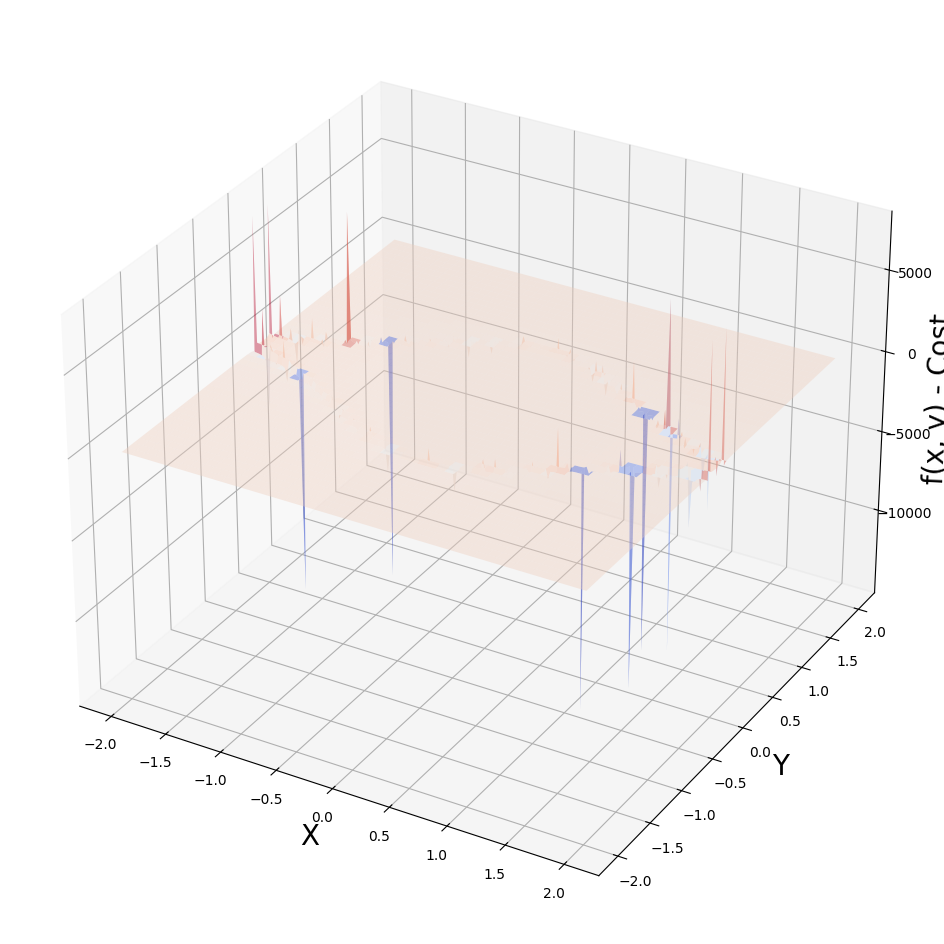

In [175]:
# Generate the 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
plt.show()

### TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.


#### Partial Derivatives & Symbolic Computation

#### $$\frac{\partial f}{\partial x} = ## [REQUIRED]

#### $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [176]:
#TASK-9 [DONE]
from sympy import symbols, diff, exp

a, b = symbols('x y')
f_symbolic = 1/(3**(-a**2 - b**2)) + 1

print('Our cost function f(x, y) is: ', f_symbolic)
partial_derivative_x = diff(f_symbolic, a)

print('\nPartial derivative wrt x is: ', partial_derivative_x)
partial_derivative_y = diff(f_symbolic, b)

print('Partial derivative wrt y is: ', partial_derivative_y)
print('\nValue of f(x, y) at x=1.8, y=1.0 is: ', f_symbolic.evalf(subs={a: 1.8, b: 1.0}))

print('\nValue of partial derivative wrt x at x=1.8, y=1.0: ', partial_derivative_x.evalf(subs={a: 1.8, b: 1.0}))
print('Value of partial derivative wrt y at x=1.8, y=1.0: ', partial_derivative_y.evalf(subs={a: 1.8, b: 1.0}))


Our cost function f(x, y) is:  3**(x**2 + y**2) + 1

Partial derivative wrt x is:  2*3**(x**2 + y**2)*x*log(3)
Partial derivative wrt y is:  2*3**(x**2 + y**2)*y*log(3)

Value of f(x, y) at x=1.8, y=1.0 is:  106.437262096007

Value of partial derivative wrt x at x=1.8, y=1.0:  417.004818559895
Value of partial derivative wrt y at x=1.8, y=1.0:  231.669343644386


**Result for TASK-9:**
- Value of partial derivative wrt x at x=1.8, y=1.0:  417.004818559895
- Value of partial derivative wrt y at x=1.8, y=1.0:  231.669343644386

#### Batch Gradient Descent with SymPy

*   List item
*   List item



In [177]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [-5.69534435941770e-5 -0.00193897895013174]
Minimum occurs at x value of:  -0.299958225901549
Minimum occurs at y value of:  -10.1631353684933
The cost is:  0.990232795434994


In [178]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return (2 * x * 3**(-x**2 - y**2) * np.log(3)) / (3**(-x**2 - y**2) + 1)**2 ## [DONE]

def fpy(x, y):
    return (2 * y * 3**(-x**2 - y**2) * np.log(3)) / (3**(-x**2 - y**2) + 1)**2 ## [DONE]

In [179]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  2.0




```
#### This is formatted as code
```

### Graphing 3D Gradient Descent

In [180]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  2.000000886957509


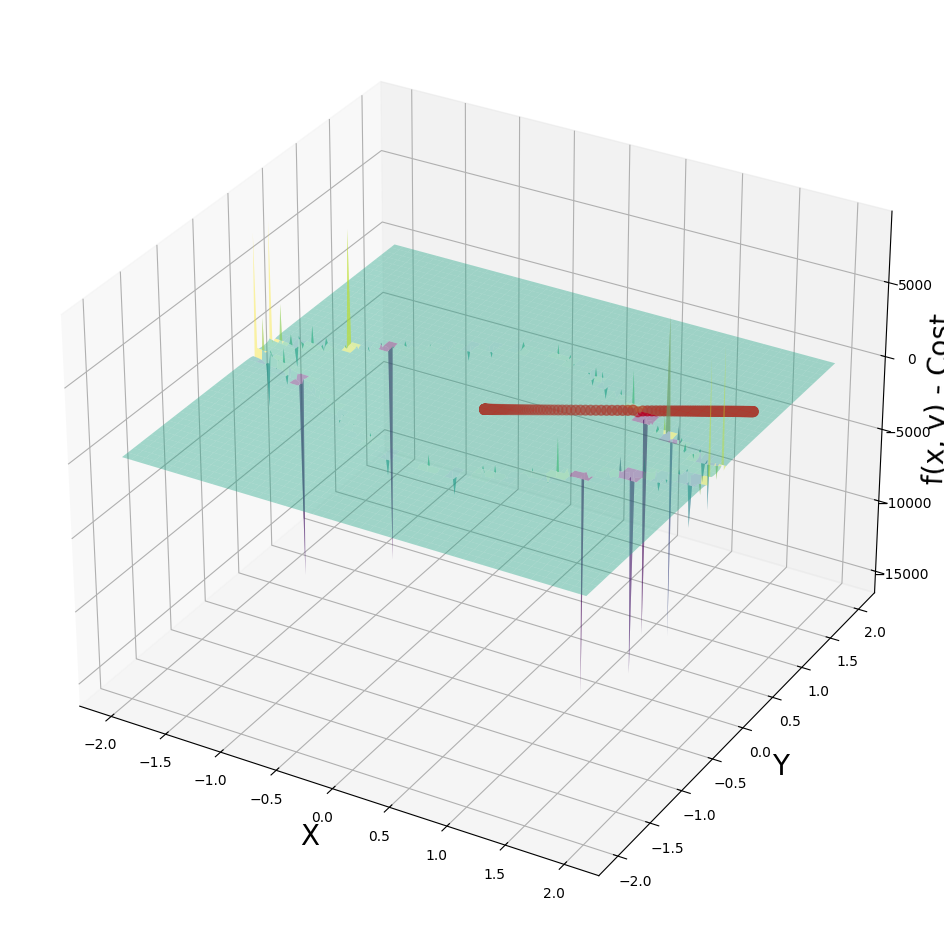

In [181]:
# Generating the 3D Plot
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)
x_4, y_4 = np.meshgrid(x_4, y_4)

fig = plt.figure(figsize=[16, 12])

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.viridis, alpha=0.4)

ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

#### For Reference, practice and play with the code below

### Example 5 - Working with data & a real cost function

#### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [182]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [183]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


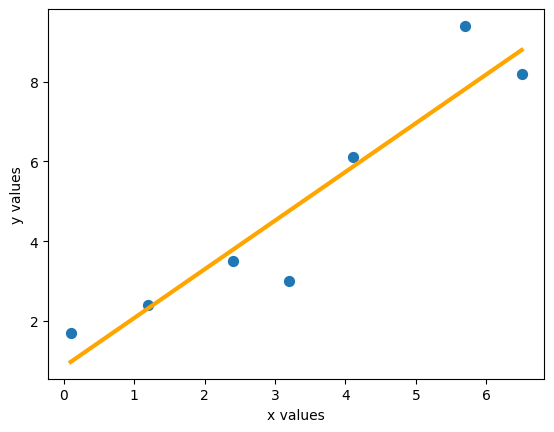

In [184]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [185]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [186]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

# Calculate MSE
mse_value = mse(y_5, y_hat)
print('Mean Squared Error (MSE):', mse_value[0])
def mse(y, y_hat):
    mse_calc = 1/7 * sum((y - y_hat)**2)
    mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

Mean Squared Error (MSE): 0.947965575979458


In [187]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


#### 3D Plot for the MSE Cost Function

#### Make data for thetas

In [188]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


#### Calc MSE using nested for loops

In [189]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

<ipython-input-189-050b7bf9b7b1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_cost[i][j] = mse(y_5, y_hat)


Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


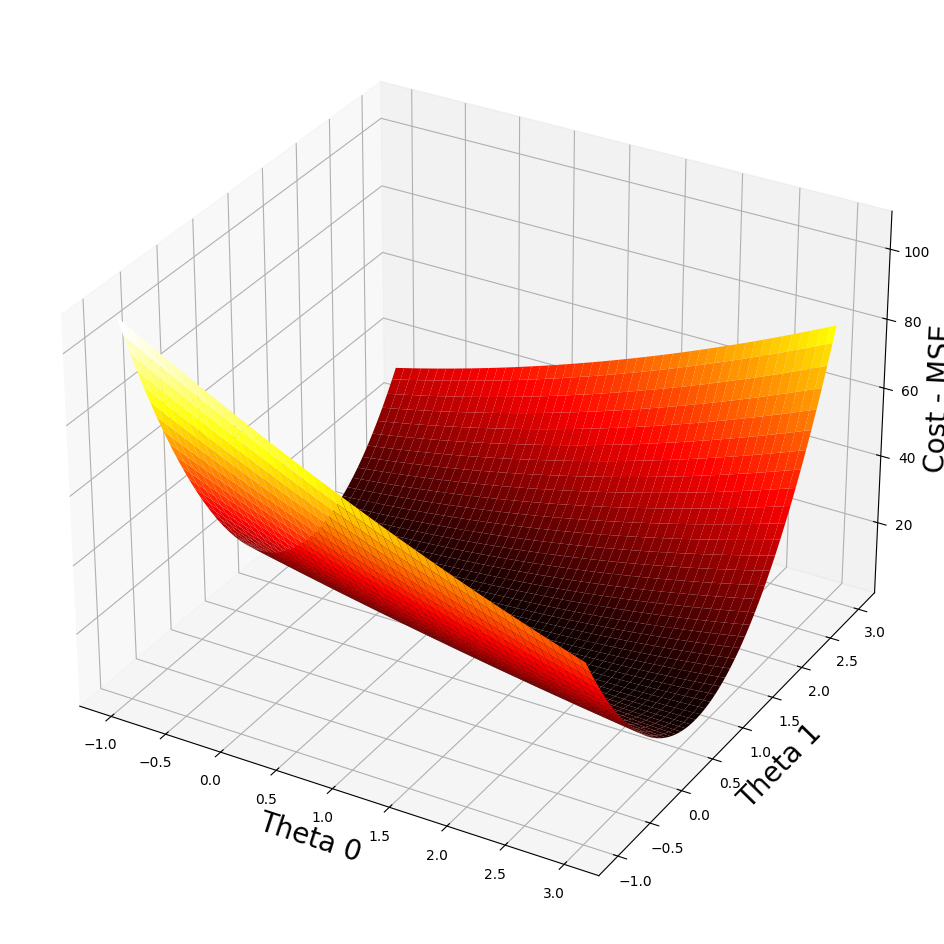

In [190]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [191]:
print('Min value of plot_cost: ', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]: ', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]: ', plot_t1[111][91])

Min value of plot_cost:  0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91]:  0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91]:  1.2311557788944723


#### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

#### MSE & Gradient Descent

In [201]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    x = x.flatten()
    y = y.flatten()

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    print("Theta0 gradient:", theta0_slope)
    print("Theta1 gradient:", theta1_slope)

    return np.array([theta0_slope, theta1_slope])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    #return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [202]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Theta0 gradient: 15.22285714285714
Theta1 gradient: 65.83999999999999
Theta0 gradient: 10.554148571428572
Theta1 gradient: 44.32648489795918
Theta0 gradient: 7.404852886763848
Theta1 gradient: 29.82236175300291
Theta0 gradient: 5.279959278543807
Theta1 gradient: 20.04399027285938
Theta0 gradient: 3.8457298806005387
Theta1 gradient: 13.451733144276844
Theta0 gradient: 2.87715754313932
Theta1 gradient: 9.007562155830817
Theta0 gradient: 2.22254170080432
Theta1 gradient: 6.011635498726844
Theta0 gradient: 1.7796053137297678
Theta1 gradient: 3.992117679241452
Theta0 gradient: 1.4793928355740245
Theta1 gradient: 2.6308957640533133
Theta0 gradient: 1.2754141739310108
Theta1 gradient: 1.7134970438615205
Theta0 gradient: 1.1363255149735687
Theta1 gradient: 1.0953233678155012
Theta0 gradient: 1.0409947128646122
Theta1 gradient: 0.6788862277032823
Theta0 gradient: 0.9751743600852737
Theta1 gradient: 0.39845858153723296
Theta0 gradient: 0.9292587611930999
Theta1 gradient: 0.20972706570427058
Thet

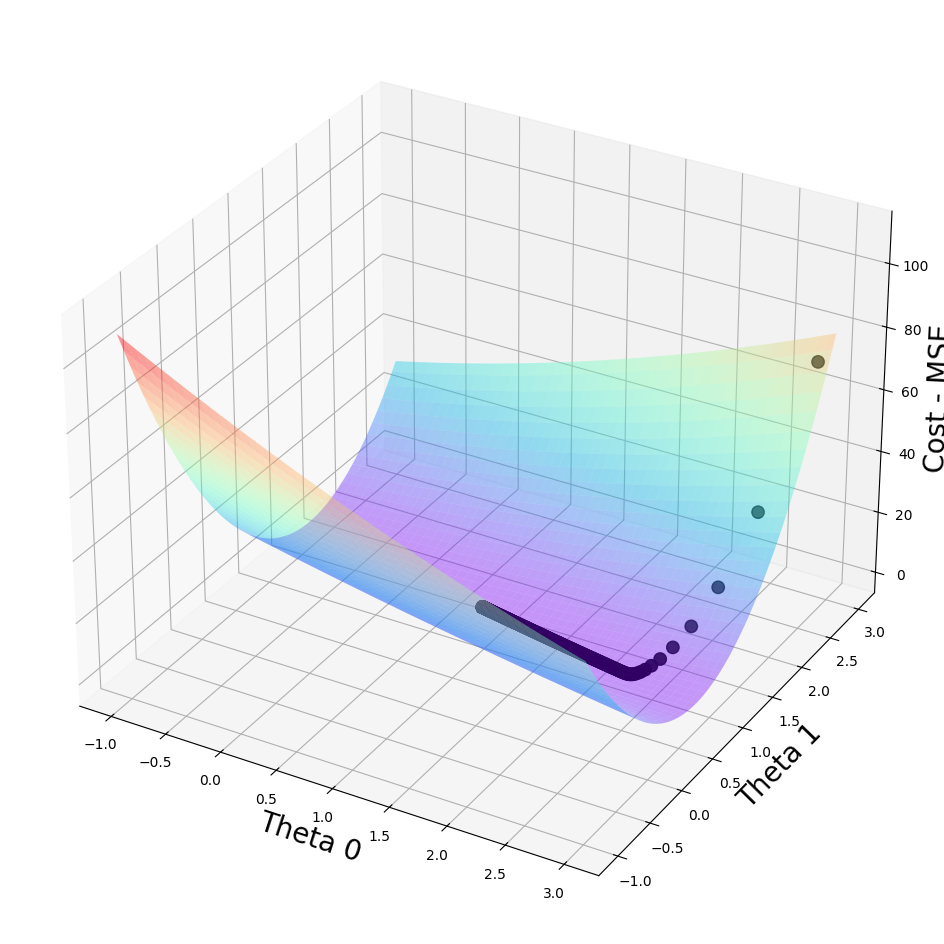

In [203]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()